## The Battle of Neighborhoods

#### Choose a Greater Toronto Area neighborhood to start business under the coronavirus pandemic in year 2020

In [96]:
import pandas as pd
import numpy as np

import folium
import requests
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

In [97]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



## 1. Data Preprocessing - Coronavirus Confirmed Cases in Ontario

In [98]:
df_Confirmed_Cases = pd.read_csv('conposcovidloc.csv')

In [99]:
df_Confirmed_Cases.head()

,Row_ID,Accurate_Episode_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-04-29,50s,FEMALE,Neither,Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
1,2,2020-05-09,20s,FEMALE,Information pending,Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
2,3,2020-05-23,50s,MALE,Information pending,Not Resolved,Yes,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
3,4,2020-05-17,30s,FEMALE,Contact of a confirmed case,Not Resolved,Yes,Renfrew County and District Health Unit,7 International Drive,Pembroke,K8A 6W5,www.rcdhu.com,45.799406,-77.118727
4,5,2020-05-17,30s,FEMALE,Contact of a confirmed case,Not Resolved,Yes,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


### Number of Cases in Each  City

In [100]:
cases_ = df_Confirmed_Cases.groupby('Reporting_PHU_City',as_index = False).count()
cases_ = cases_[['Reporting_PHU_City','Row_ID']]
cases_.rename(columns = {'Row_ID':'Number of Cases'},inplace = True)
cases_.sort_values(by='Number of Cases', ascending=False, inplace = True)
cases_.reset_index(drop = True,inplace = True)
cases_.head(10)

,Reporting_PHU_City,Number of Cases
0,Toronto,9555
1,Mississauga,4054
2,Newmarket,2285
3,Ottawa,1917
4,Whitby,1399
5,Waterloo,1050
6,Windsor,910
7,Hamilton,642
8,Thorold,630
9,Oakville,623


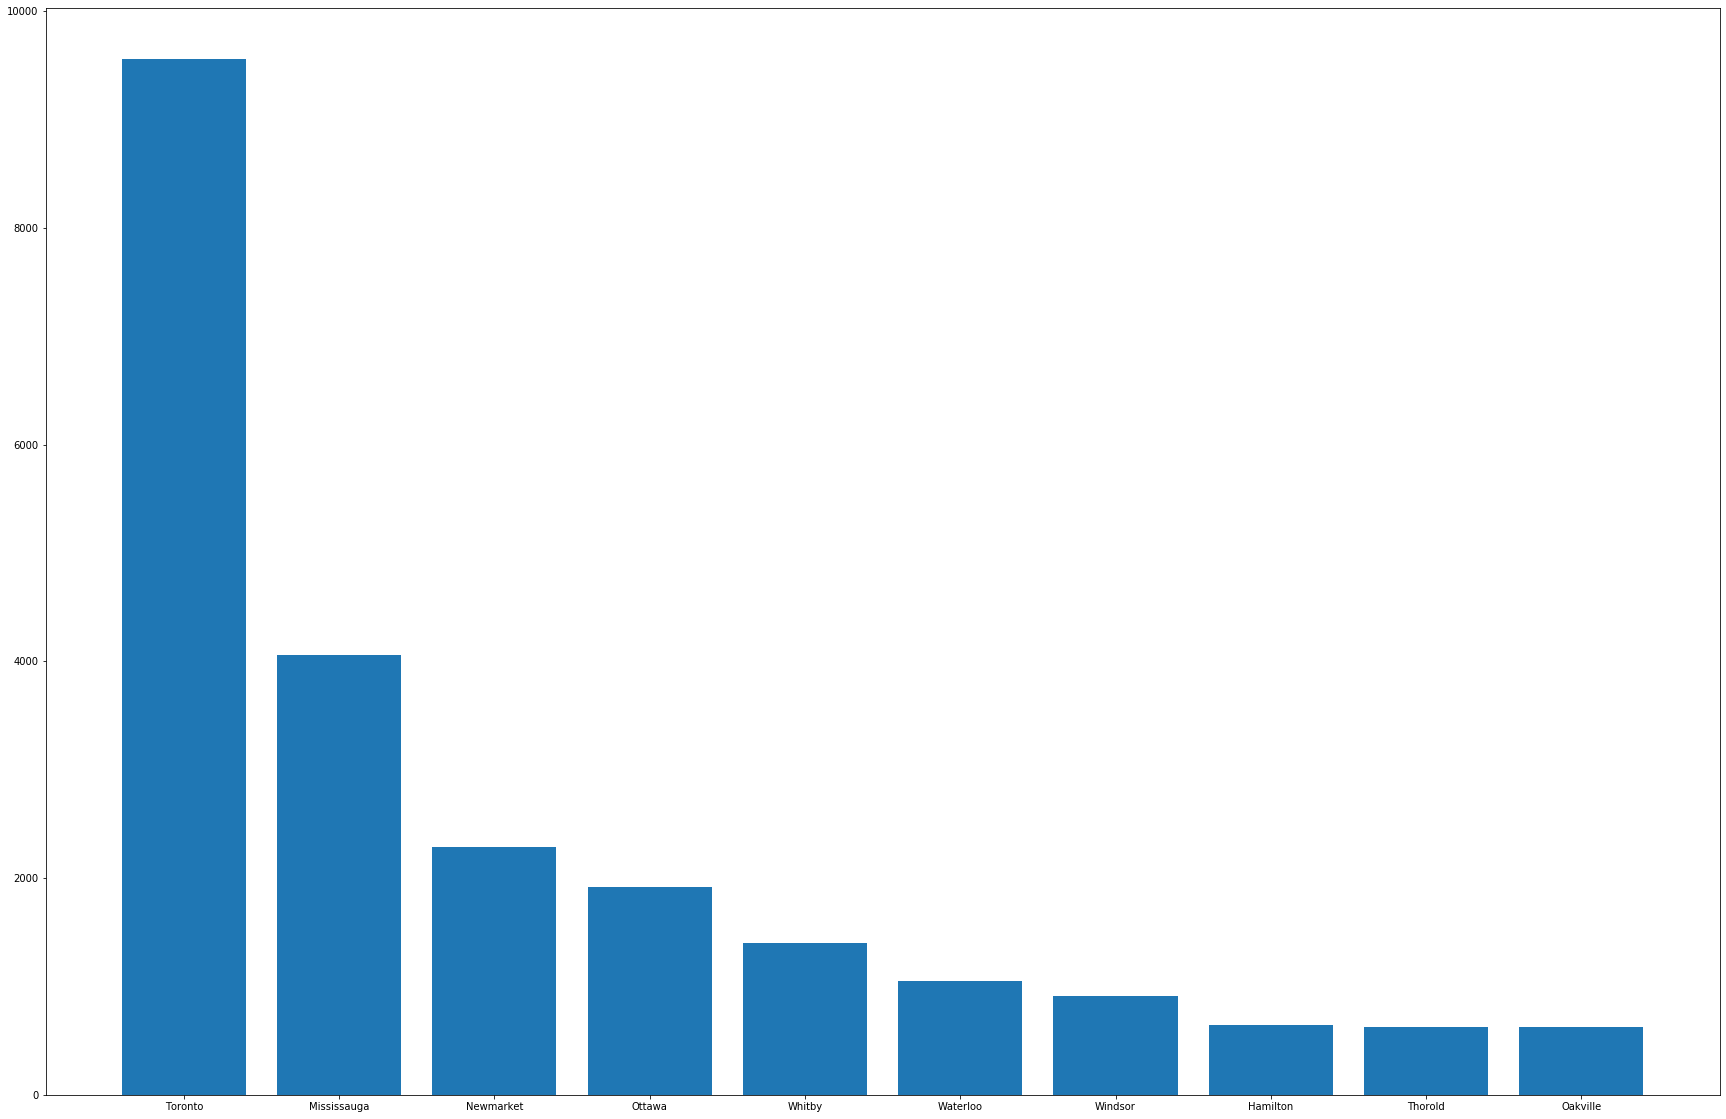

In [101]:
plt.figure(figsize=(30,20))
plt.bar(cases_['Reporting_PHU_City'][:10],cases_['Number of Cases'][:10])
plt.show()

In [102]:
Latitude = df_Confirmed_Cases.Reporting_PHU_Latitude.unique()
Longitude = df_Confirmed_Cases.Reporting_PHU_Longitude.unique()
d = {"Latitude" : Latitude,"Longitude":Longitude}
dataframe = pd.DataFrame(d)
dataframe.head()

,Latitude,Longitude
0,43.647471,-79.708893
1,44.048023,-79.480239
2,45.799406,-77.118727
3,43.656591,-79.379358
4,43.898605,-78.940341


### Cities in Ontario that have confirmed coronavirus cases

In [103]:
# create the map
map_Ontario = folium.Map(location=[43.6534817, -79.3839347], zoom_start=10)

# add markers to map
for lat, lng in zip(dataframe['Latitude'], dataframe['Longitude']):
    #label = '{}, {}'.format(neighborhood, borough)
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Ontario)  
    
map_Ontario

## 2. The City We Choose - Oakville

## Neighborhood Analysis

In [104]:
oakville_neighborhoods = pd.read_csv('oakville_neighborhoods.csv')
oakville_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Oakville,Old Oakville,43.405220,-79.696050
1,Oakville,Kerr Village,43.429420,-79.781030
2,Oakville,Bronte,43.397653,-79.712634
3,Oakville,Eastlake,43.467517,-79.687666
4,Oakville,Clearview,43.499500,-79.661499


In [105]:
address = 'Oakville'

geolocator = Nominatim(user_agent="oakville_explorer")
location = geolocator.geocode(address)
oakville_latitude = location.latitude
oakville_longitude = location.longitude
print('The geograpical coordinate of Oakville are {}, {}.'.format(oakville_latitude, oakville_longitude))

The geograpical coordinate of Oakville are 43.447436, -79.666672.


### 13 Neighborhoods in Oakville

In [106]:
map_oakville = folium.Map(location=[oakville_latitude, oakville_longitude], zoom_start=11)

for lat, lng, label in zip(oakville_neighborhoods['Latitude'], oakville_neighborhoods['Longitude'], oakville_neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='#3186cc',
        #fill_color='#174ea1',
        fill_opacity=0.7,
        parse_html=False).add_to(map_oakville)  
    
map_oakville

In [107]:
CLIENT_ID = 'IGYSIE4TFYGQP3BFH3JLR4UDEEZBBKRRXBLKFP0A3WTP223B'
CLIENT_SECRET = 'TEARXFXQD5OITBVZVUEV2TC3UHLCFEVTEEHFF5HXGSMAPN1F'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IGYSIE4TFYGQP3BFH3JLR4UDEEZBBKRRXBLKFP0A3WTP223B
CLIENT_SECRET:TEARXFXQD5OITBVZVUEV2TC3UHLCFEVTEEHFF5HXGSMAPN1F


In [108]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [109]:
# type your answer here
LIMIT = 100
radius = 500
oakville_venues = getNearbyVenues(names=oakville_neighborhoods['Neighborhood'],
                                   latitudes=oakville_neighborhoods['Latitude'],
                                   longitudes=oakville_neighborhoods['Longitude']
                                  )

Old Oakville
Kerr Village
Bronte
Eastlake
Clearview
College Park
Iroquois Ridge North
Iroquois Ridge South
Glen Abbey
Palermo
River Oaks
Uptown Core
West Oak Trails


In [110]:
print(oakville_venues.shape)
oakville_venues.head()

(110, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Old Oakville,43.40522,-79.69605,Coronation Park,43.408097,-79.692505,Park
1,Old Oakville,43.40522,-79.69605,Birch Hill Promenade,43.403829,-79.694121,Park
2,Old Oakville,43.40522,-79.69605,Sir John Colborne Park,43.404264,-79.699365,Park
3,Old Oakville,43.40522,-79.69605,AJ & W Roofing,43.402300,-79.698878,Construction & Landscaping
4,Kerr Village,43.42942,-79.78103,NEWDAY PAINTING,43.428365,-79.779003,Home Service


In [111]:
oakville_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bronte,20,20,20,20,20,20
Clearview,4,4,4,4,4,4
College Park,13,13,13,13,13,13
Eastlake,11,11,11,11,11,11
Glen Abbey,13,13,13,13,13,13
Iroquois Ridge North,4,4,4,4,4,4
Iroquois Ridge South,4,4,4,4,4,4
Kerr Village,4,4,4,4,4,4
Old Oakville,4,4,4,4,4,4


In [112]:
print('There are {} uniques categories.'.format(len(oakville_venues['Venue Category'].unique())))

There are 61 uniques categories.


### The Most Common Venue for Each Neighborhood

In [113]:
# one hot encoding
oakville_onehot = pd.get_dummies(oakville_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
oakville_onehot['Neighborhood'] = oakville_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [oakville_onehot.columns[-1]] + list(oakville_onehot.columns[:-1])
oakville_onehot = oakville_onehot[fixed_columns]

oakville_onehot.head()

,Wings Joint,American Restaurant,Asian Restaurant,Bakery,Bank,Beer Store,Big Box Store,Bookstore,Breakfast Spot,Burrito Place,...,Sandwich Place,Seafood Restaurant,Skating Rink,Snack Place,Sports Bar,Stables,Sushi Restaurant,Swim School,Thai Restaurant,Video Game Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
oakville_onehot.shape

(110, 61)

In [115]:
oakville_grouped = oakville_onehot.groupby('Neighborhood').mean().reset_index()
oakville_grouped

,Neighborhood,Wings Joint,American Restaurant,Asian Restaurant,Bakery,Bank,Beer Store,Big Box Store,Bookstore,Breakfast Spot,...,Sandwich Place,Seafood Restaurant,Skating Rink,Snack Place,Sports Bar,Stables,Sushi Restaurant,Swim School,Thai Restaurant,Video Game Store
0,Bronte,0.000000,0.05,0.00,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.05,0.000000,0.000000,0.000000,0.00,0.05,0.000000,0.05,0.000000
1,Clearview,0.000000,0.00,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000
2,College Park,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,...,0.076923,0.00,0.000000,0.000000,0.076923,0.00,0.00,0.000000,0.00,0.000000
3,Eastlake,0.000000,0.00,0.00,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,...,0.090909,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.090909,0.00,0.000000
4,Glen Abbey,0.000000,0.00,0.00,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,...,0.076923,0.00,0.076923,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000
5,Iroquois Ridge North,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000
6,Iroquois Ridge South,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000
7,Kerr Village,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.25,0.00,0.000000,0.00,0.000000
8,Old Oakville,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000
9,Palermo,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000


In [116]:
num_top_venues = 5

for hood in oakville_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = oakville_grouped[oakville_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bronte----
                venue  freq
0          Restaurant  0.15
1        Gourmet Shop  0.10
2                Café  0.05
3  Seafood Restaurant  0.05
4         Pizza Place  0.05


----Clearview----
                   venue  freq
0  Portuguese Restaurant  0.25
1       Asian Restaurant  0.25
2                   Park  0.25
3            Pizza Place  0.25
4                   Pool  0.00


----College Park----
                  venue  freq
0            Restaurant  0.15
1         Burrito Place  0.08
2           Pizza Place  0.08
3                   Pub  0.08
4  Fast Food Restaurant  0.08


----Eastlake----
                      venue  freq
0         Health Food Store  0.09
1  Mediterranean Restaurant  0.09
2      Fast Food Restaurant  0.09
3               Coffee Shop  0.09
4            Sandwich Place  0.09


----Glen Abbey----
                  venue  freq
0                   Gym  0.15
1              Pharmacy  0.15
2     Convenience Store  0.08
3          Skating Rink  0.08
4  Fast Food R

In [117]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [118]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = oakville_grouped['Neighborhood']

for ind in np.arange(oakville_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(oakville_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronte,Restaurant,Gourmet Shop,Thai Restaurant,Coffee Shop,Italian Restaurant,Café,French Restaurant,Pizza Place,Cuban Restaurant,Pharmacy
1,Clearview,Pizza Place,Asian Restaurant,Park,Portuguese Restaurant,Deli / Bodega,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Video Game Store
2,College Park,Restaurant,Pizza Place,Deli / Bodega,Bus Station,Burrito Place,Pub,College Bookstore,Sandwich Place,Bookstore,Sports Bar
3,Eastlake,Pizza Place,Sandwich Place,Health Food Store,Fast Food Restaurant,Mediterranean Restaurant,Coffee Shop,Gastropub,Gas Station,Swim School,Bank
4,Glen Abbey,Gym,Pharmacy,Sandwich Place,Fast Food Restaurant,Ice Cream Shop,Convenience Store,Restaurant,Pizza Place,Beer Store,Bank
5,Iroquois Ridge North,Playground,Pizza Place,Dog Run,Pool,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Deli / Bodega
6,Iroquois Ridge South,Playground,Pizza Place,Dog Run,Pool,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Deli / Bodega
7,Kerr Village,Playground,Home Service,Stables,Coffee Shop,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dog Run
8,Old Oakville,Park,Construction & Landscaping,Video Game Store,Grocery Store,Gastropub,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store
9,Palermo,Gastropub,Middle Eastern Restaurant,Video Game Store,Grocery Store,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dog Run


## 3. Cluster Analysis

In [119]:
# set number of clusters
kclusters = 4

oakville_grouped_clustering = oakville_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(oakville_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 2, 2, 2, 1, 3], dtype=int32)

In [120]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

oakville_merged = oakville_neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
oakville_merged = oakville_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

oakville_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Oakville,Old Oakville,43.405220,-79.696050,1,Park,Construction & Landscaping,Video Game Store,Grocery Store,Gastropub,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store
1,Oakville,Kerr Village,43.429420,-79.781030,2,Playground,Home Service,Stables,Coffee Shop,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dog Run
2,Oakville,Bronte,43.397653,-79.712634,0,Restaurant,Gourmet Shop,Thai Restaurant,Coffee Shop,Italian Restaurant,Café,French Restaurant,Pizza Place,Cuban Restaurant,Pharmacy
3,Oakville,Eastlake,43.467517,-79.687666,0,Pizza Place,Sandwich Place,Health Food Store,Fast Food Restaurant,Mediterranean Restaurant,Coffee Shop,Gastropub,Gas Station,Swim School,Bank
4,Oakville,Clearview,43.499500,-79.661499,0,Pizza Place,Asian Restaurant,Park,Portuguese Restaurant,Deli / Bodega,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Video Game Store


In [121]:
# create map
map_clusters = folium.Map(location=[oakville_latitude, oakville_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(oakville_merged['Latitude'], oakville_merged['Longitude'], oakville_merged['Neighborhood'], oakville_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster Results

In [122]:
oakville_merged.loc[oakville_merged['Cluster Labels'] == 0, oakville_merged.columns[[1] + list(range(5, oakville_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bronte,Restaurant,Gourmet Shop,Thai Restaurant,Coffee Shop,Italian Restaurant,Café,French Restaurant,Pizza Place,Cuban Restaurant,Pharmacy
3,Eastlake,Pizza Place,Sandwich Place,Health Food Store,Fast Food Restaurant,Mediterranean Restaurant,Coffee Shop,Gastropub,Gas Station,Swim School,Bank
4,Clearview,Pizza Place,Asian Restaurant,Park,Portuguese Restaurant,Deli / Bodega,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Video Game Store
5,College Park,Restaurant,Pizza Place,Deli / Bodega,Bus Station,Burrito Place,Pub,College Bookstore,Sandwich Place,Bookstore,Sports Bar
8,Glen Abbey,Gym,Pharmacy,Sandwich Place,Fast Food Restaurant,Ice Cream Shop,Convenience Store,Restaurant,Pizza Place,Beer Store,Bank
11,Uptown Core,Electronics Store,Clothing Store,Fast Food Restaurant,Falafel Restaurant,Massage Studio,Liquor Store,Indian Restaurant,Ice Cream Shop,Grocery Store,Video Game Store


In [123]:
oakville_merged.loc[oakville_merged['Cluster Labels'] == 1, oakville_merged.columns[[1] + list(range(5, oakville_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Old Oakville,Park,Construction & Landscaping,Video Game Store,Grocery Store,Gastropub,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store
12,West Oak Trails,Park,Video Game Store,Grocery Store,Gastropub,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dog Run


In [124]:
oakville_merged.loc[oakville_merged['Cluster Labels'] == 2, oakville_merged.columns[[1] + list(range(5, oakville_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Kerr Village,Playground,Home Service,Stables,Coffee Shop,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dog Run
6,Iroquois Ridge North,Playground,Pizza Place,Dog Run,Pool,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Deli / Bodega
7,Iroquois Ridge South,Playground,Pizza Place,Dog Run,Pool,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Deli / Bodega
10,River Oaks,Playground,Sandwich Place,Coffee Shop,Gastropub,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dog Run


In [125]:
oakville_merged.loc[oakville_merged['Cluster Labels'] == 3, oakville_merged.columns[[1] + list(range(5, oakville_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Palermo,Gastropub,Middle Eastern Restaurant,Video Game Store,Grocery Store,Gas Station,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dog Run
